In [1]:
# 讓plt能夠顯示中文字體
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

# 將 font-family 設為 Taipei Sans TC Beta
# 設定完後，之後的圖表都可以顯示中文了
matplotlib.rc('font', family='Taipei Sans TC Beta')

--2023-11-13 08:17:25--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.192.101, 173.194.192.113, 173.194.192.102, ...
Connecting to drive.google.com (drive.google.com)|173.194.192.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0p36h25q2fm6uaci18orlmfg9q88gjnd/1699863375000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=44d6fbe2-3057-49fd-90c9-c48fb3d95c4f [following]
--2023-11-13 08:17:26--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0p36h25q2fm6uaci18orlmfg9q88gjnd/1699863375000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=44d6fbe2-3057-49fd-90c9-c48fb3d95c4f
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 209.85.147.132, 2607:f8b0:4001:c20::84
Connecting to do

In [80]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets as ds
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/永豐/training_data.csv",encoding='utf-8')
df_t_pt = pd.read_csv("/content/drive/MyDrive/永豐/private_dataset.csv",encoding='utf-8')
df_t_pb = pd.read_csv("/content/drive/MyDrive/永豐/public_dataset.csv",encoding='utf-8')
df

# #17備註只有92個有值，有沒有備註應該差距不大，so 刪除
df = df.drop(['備註'],axis=1)
# #ID列没有用，直接删掉
df.drop('ID', axis=1, inplace=True)
# #使用分區幾乎都是None 刪除
df = df.drop(['使用分區'],axis=1)

df_t_pt = df_t_pt.drop(['備註'],axis=1)
df_t_pt = df_t_pt.drop(['使用分區'],axis=1)

df_t_pb = df_t_pb.drop(['備註'],axis=1)
df_t_pb = df_t_pb.drop(['使用分區'],axis=1)

In [81]:
t_id_pt = df_t_pt['ID']
df_t_pt.drop('ID', axis=1, inplace=True)

t_id_pb = df_t_pb['ID']
df_t_pb.drop('ID', axis=1, inplace=True)

In [71]:
df_t_pb

,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積
0,新北市,樹林區,大有路,2.039378,3,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),13.916667,0.472202,0.146176,1.0,288745,2760266,0.849664,0.146161,-0.438452
1,新北市,三重區,力行路一段,-0.077786,5,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),40.833333,-0.546455,-0.819326,0.0,298751,2773492,-0.004102,0.064257,-0.438452
2,新北市,板橋區,民生路三段,-0.555766,2,20,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.333333,0.124032,-0.167419,1.0,297000,2769106,-0.285862,-0.775260,1.323042
3,新北市,泰山區,明志路二段,-0.744838,6,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.500000,-0.027072,0.115280,1.0,293076,2771160,0.027582,0.316794,-0.139532
4,台北市,信義區,忠孝東路五段,-0.610923,3,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),40.500000,-0.863600,-0.819326,0.0,308103,2770220,-0.883328,-0.560262,-0.075477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,台南市,中西區,中華西路二段,0.560113,5,5,集合住宅,鋼筋混凝土造,公寓(5樓含以下無電梯),0.833333,-0.788335,-0.016028,1.0,166751,2545157,-0.867769,-1.078987,-0.438452
5872,台中市,北區,育樂街,-1.020142,5,22,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),3.416667,-0.910137,0.799628,1.0,218814,2672567,-1.107095,-0.754784,-0.438452
5873,新北市,新店區,安康路二段,-0.662691,10,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),12.583333,-0.459699,0.004054,1.0,301609,2761359,-0.474267,-0.131972,-0.438452
5874,台北市,信義區,忠孝東路五段,0.513752,2,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),36.250000,0.357294,-0.819326,0.0,308833,2770624,0.926327,1.243333,-0.316749


In [ ]:
df[df['地區']=='新北市樹林區'].median()

<ipython-input-321-b9d594c7a6c2>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df[df['地區']=='新北市樹林區'].median()


土地面積     -1.871148e-01
移轉層次      5.000000e+00
總樓層數      1.300000e+01
屋齡        2.241667e+01
建物面積     -3.378971e-01
車位面積     -5.675228e-01
車位個數      5.000000e-01
橫坐標       2.916960e+05
縱坐標       2.763680e+06
主建物面積    -1.277256e-01
陽台面積     -3.300437e-02
附屬建物面積   -4.384519e-01
單價        1.571052e+00
dtype: float64

In [ ]:
df['單價'].median()

1.7701446257026745

In [ ]:
large_land_area = df[df['土地面積'] > 2.03]
print(large_land_area)
large_land_area[large_land_area['地區']=='新北市樹林區']

        縣市       土地面積  移轉層次  總樓層數  主要用途    主要建材             建物型態         屋齡  \
90     桃園市   2.302810     3     5   住家用  鋼筋混凝土造     公寓(5樓含以下無電梯)  14.750000   
105    新北市   9.033914     4     6   住家用  鋼筋混凝土造    華廈(10層含以下有電梯)   5.166667   
135    新北市   2.834216     2     7  集合住宅  鋼筋混凝土造    華廈(10層含以下有電梯)   3.916667   
201    新北市  10.679156     4     6  集合住宅  鋼筋混凝土造    華廈(10層含以下有電梯)   2.833333   
213    台北市   2.470252     7    23  集合住宅     鋼骨造  住宅大樓(11層含以上有電梯)   1.500000   
...    ...        ...   ...   ...   ...     ...              ...        ...   
11583  台中市   2.422401     2    12  集合住宅  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  14.916667   
11609  新北市   2.077183     3    12  集合住宅  鋼筋混凝土造  住宅大樓(11層含以上有電梯)   9.666667   
11692  台北市   2.582537    13    15   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  15.333333   
11697  台北市   2.221216     3     8   住家用  鋼筋混凝土造    華廈(10層含以下有電梯)  31.333333   
11719  新竹市   2.291635    11    12  集合住宅  鋼筋混凝土造  住宅大樓(11層含以上有電梯)   6.833333   

           建物面積      車位面積  車位個數     橫坐標      縱坐標   

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,地區,地段
4982,新北市,4.186032,4,8,集合住宅,鋼筋混凝土造,華廈(10層含以下有電梯),9.416667,2.828383,0.765642,2.0,288486,2760242,2.487605,1.647734,0.434822,2.004372,新北市樹林區,新北市樹林區學林
9279,新北市,2.126236,3,7,集合住宅,鋼筋混凝土造,華廈(10層含以下有電梯),8.833333,1.131772,0.019502,1.0,288416,2760346,0.844006,0.722901,1.124474,2.027794,新北市樹林區,新北市樹林區學林
10015,新北市,2.379718,20,20,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),12.916667,4.021699,2.142062,2.0,288081,2760297,4.096973,2.685185,-0.438452,1.910681,新北市樹林區,新北市樹林區大義


In [ ]:
df_t.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5876 entries, 0 to 5875
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   縣市      5876 non-null   object 
 1   鄉鎮市區    5876 non-null   object 
 2   路名      5876 non-null   object 
 3   土地面積    5876 non-null   float64
 4   移轉層次    5876 non-null   int64  
 5   總樓層數    5876 non-null   int64  
 6   主要用途    5876 non-null   object 
 7   主要建材    5876 non-null   object 
 8   建物型態    5876 non-null   object 
 9   屋齡      5876 non-null   float64
 10  建物面積    5876 non-null   float64
 11  車位面積    5876 non-null   float64
 12  車位個數    5876 non-null   float64
 13  橫坐標     5876 non-null   int64  
 14  縱坐標     5876 non-null   int64  
 15  主建物面積   5876 non-null   float64
 16  陽台面積    5876 non-null   float64
 17  附屬建物面積  5876 non-null   float64
dtypes: float64(8), int64(4), object(6)
memory usage: 826.4+ KB


,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價
count,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,11751.000000,1.175100e+04,11751.000000,11751.000000,11751.000000,11751.000000
mean,0.018416,7.433665,12.602672,21.319058,0.030517,0.021030,0.638669,268260.431878,2.719114e+06,0.026623,0.024876,0.023621,1.993343
std,1.072279,5.089029,6.840007,14.425560,1.083602,1.030720,0.678157,50065.477460,9.271248e+04,1.077374,1.072452,1.177752,1.002079
min,-1.619755,2.000000,2.000000,0.000000,-1.909259,-0.819326,0.000000,-23391.000000,2.493809e+06,-2.070340,-1.642077,-0.438452,0.177415
25%,-0.646264,4.000000,7.000000,8.083333,-0.619995,-0.819326,0.000000,237588.500000,2.708082e+06,-0.612460,-0.623396,-0.438452,1.301691
50%,-0.149839,6.000000,12.000000,21.750000,-0.191390,-0.334257,1.000000,294675.000000,2.766329e+06,-0.148660,-0.077369,-0.438452,1.770145
75%,0.410167,10.000000,15.000000,31.250000,0.339483,0.677589,1.000000,302130.000000,2.772017e+06,0.395765,0.458420,0.146578,2.402558
max,19.475175,46.000000,68.000000,60.083333,13.026437,14.007695,3.000000,334128.000000,2.790801e+06,12.099402,13.842902,33.713188,13.622033


In [ ]:
print(df['土地面積'].describe())
#sns.distplot(df['土地面積'])

count    11751.000000
mean         0.018416
std          1.072279
min         -1.619755
25%         -0.646264
50%         -0.149839
75%          0.410167
max         19.475175
Name: 土地面積, dtype: float64


In [82]:
#刪除 土地面積離群值
s = df['土地面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*6.2
lower_lim = s['25%'] - IQR*6.2
df = df[df['土地面積'] < upper_lim]

In [83]:
#刪除 陽台面積離群值
s = df['陽台面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*5
lower_lim = s['25%'] - IQR*5
df = df[df['陽台面積'] < upper_lim]

In [84]:
#刪除 主建物面積離群值
s = df['主建物面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*5
lower_lim = s['25%'] - IQR*5
df = df[df['主建物面積'] < upper_lim]

In [85]:
#刪除 附屬建物面積離群值
s = df['附屬建物面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*20
lower_lim = s['25%'] - IQR*20
df = df[df['附屬建物面積'] < upper_lim]

In [86]:
#刪除 車位面積 離群值
s = df['車位面積'].describe()
IQR = s['75%'] - s['25%']
upper_lim = s['75%'] + IQR*4
lower_lim = s['25%'] - IQR*4
df = df[df['車位面積'] < upper_lim]

In [78]:
df.describe()

,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價
count,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,1.162500e+04,11625.000000,11625.000000,11625.000000,11625.000000
mean,-0.020895,7.417548,12.554409,21.328502,-0.017092,0.004964,0.630194,268283.358624,2.719237e+06,-0.018966,-0.011225,-0.018803,1.987293
std,0.910636,5.051551,6.757295,14.453496,0.949022,0.991893,0.665697,50053.858234,9.262338e+04,0.937986,0.957989,0.798808,0.975585
min,-1.619755,2.000000,2.000000,0.000000,-1.909259,-0.819326,0.000000,-23391.000000,2.493809e+06,-2.070340,-1.642077,-0.438452,0.177415
25%,-0.651539,4.000000,7.000000,8.083333,-0.624592,-0.819326,0.000000,238037.000000,2.728738e+06,-0.616845,-0.628515,-0.438452,1.301691
50%,-0.160918,6.000000,12.000000,21.750000,-0.202881,-0.349706,1.000000,294665.000000,2.766329e+06,-0.155732,-0.084194,-0.438452,1.770145
75%,0.394882,10.000000,15.000000,31.333333,0.311331,0.671409,1.000000,302114.000000,2.772025e+06,0.367617,0.444769,0.140172,2.402558
max,6.916701,46.000000,68.000000,60.083333,5.745888,6.078220,3.000000,334128.000000,2.790801e+06,5.355274,5.853847,11.693440,13.622033


In [77]:
df_t_pt.describe()

,土地面積,移轉層次,總樓層數,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5.875000e+03,5875.000000,5875.000000,5875.000000
mean,-0.033971,7.303319,12.486298,21.207390,-0.035707,-0.016858,0.623149,268466.746553,2.720122e+06,-0.037731,-0.027523,-0.011231
std,0.911242,4.953538,6.537361,14.483559,0.895382,0.967465,0.661152,49224.428598,9.097313e+04,0.900942,0.919311,0.837952
min,-1.608051,2.000000,2.000000,0.083333,-1.794352,-0.819326,0.000000,-23196.000000,2.495925e+06,-2.029038,-1.642077,-0.438452
25%,-0.671884,4.000000,7.000000,7.833333,-0.611665,-0.819326,0.000000,222396.000000,2.704796e+06,-0.605105,-0.654110,-0.438452
50%,-0.170075,6.000000,12.000000,21.416667,-0.200582,-0.417677,1.000000,294738.000000,2.766222e+06,-0.144699,-0.099551,-0.438452
75%,0.386518,10.000000,15.000000,31.000000,0.321098,0.649782,1.000000,302187.000000,2.771954e+06,0.371860,0.425999,0.146578
max,7.116156,35.000000,41.000000,62.500000,6.015347,5.140525,3.000000,333305.000000,2.788119e+06,5.846939,4.896594,13.309745


In [ ]:
large_land_area = df[df['單價'] > 10]
print(large_land_area)

        縣市 鄉鎮市區     路名      土地面積  移轉層次  總樓層數 主要用途 主要建材             建物型態  \
5659   台南市  永康區   復國一路 -0.845707    13    16  住家用   其他  住宅大樓(11層含以上有電梯)   
11014  台北市  大安區  仁愛路三段  3.558660     7    28  住家用  鋼骨造  住宅大樓(11層含以上有電梯)   

              屋齡      建物面積      車位面積  車位個數     橫坐標      縱坐標     主建物面積  \
5659    4.833333 -0.679173  0.983460   1.0  172697  2545702 -0.823638   
11014  17.000000  4.542231  3.348553   2.0  304110  2770200  4.485949   

           陽台面積    附屬建物面積         單價  
5659  -0.957837 -0.438452  13.622033  
11014  1.321825  0.199956  12.263516  


In [79]:
def classify_floor(floor):
    if floor <= 5:
        return 0
    elif floor <= 15:
        return 1
    elif floor <= 25:
        return 2
    elif floor <= 35:
        return 3
    else:
        return 4

# 移轉層次 分為 低0 中1 高2
df['樓層'] = df['移轉層次'].apply(classify_floor)
df_t_pt['樓層'] = df_t_pt['移轉層次'].apply(classify_floor)
df_t_pb['樓層'] = df_t_pb['移轉層次'].apply(classify_floor)
df_t_pb

,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,樓層
0,新北市,樹林區,大有路,2.039378,3,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),13.916667,0.472202,0.146176,1.0,288745,2760266,0.849664,0.146161,-0.438452,0
1,新北市,三重區,力行路一段,-0.077786,5,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),40.833333,-0.546455,-0.819326,0.0,298751,2773492,-0.004102,0.064257,-0.438452,0
2,新北市,板橋區,民生路三段,-0.555766,2,20,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.333333,0.124032,-0.167419,1.0,297000,2769106,-0.285862,-0.775260,1.323042,0
3,新北市,泰山區,明志路二段,-0.744838,6,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.500000,-0.027072,0.115280,1.0,293076,2771160,0.027582,0.316794,-0.139532,1
4,台北市,信義區,忠孝東路五段,-0.610923,3,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),40.500000,-0.863600,-0.819326,0.0,308103,2770220,-0.883328,-0.560262,-0.075477,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,台南市,中西區,中華西路二段,0.560113,5,5,集合住宅,鋼筋混凝土造,公寓(5樓含以下無電梯),0.833333,-0.788335,-0.016028,1.0,166751,2545157,-0.867769,-1.078987,-0.438452,0
5872,台中市,北區,育樂街,-1.020142,5,22,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),3.416667,-0.910137,0.799628,1.0,218814,2672567,-1.107095,-0.754784,-0.438452,0
5873,新北市,新店區,安康路二段,-0.662691,10,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),12.583333,-0.459699,0.004054,1.0,301609,2761359,-0.474267,-0.131972,-0.438452,1
5874,台北市,信義區,忠孝東路五段,0.513752,2,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),36.250000,0.357294,-0.819326,0.0,308833,2770624,0.926327,1.243333,-0.316749,0


In [19]:
def classify_floor(floor):
    if floor <= 5:
        return 0
    elif floor <= 15:
        return 1
    elif floor <= 25:
        return 2
    elif floor <= 35:
        return 3
    else:
        return 4

# 移轉層次 分為 低0 中1 高2
df['樓高'] = df['總樓層數'].apply(classify_floor)
df_t['樓高'] = df_t['總樓層數'].apply(classify_floor)
df

,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,...,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,樓層,樓高
0,台北市,大安區,敦化南路二段,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,...,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714,1,1
1,台北市,萬華區,水源路,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,...,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258,1,1
2,高雄市,鳳山區,北忠街,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,...,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072,1,1
3,新北市,新莊區,福前街,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,...,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217,1,1
4,新北市,板橋區,文化路一段,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,...,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,桃園市,八德區,介壽路二段,0.706189,4,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),28.333333,...,0.484488,1.0,280165,2758675,0.146962,-0.181455,-0.171559,0.903505,0,0
11747,新竹市,新竹市,東南街,-0.225809,2,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),29.250000,...,-0.819326,0.0,247333,2743084,-0.181192,-0.067131,-0.163018,1.044041,0,1
11748,新北市,汐止區,建成路,-0.943908,15,17,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),22.833333,...,-0.819326,0.0,316680,2773938,-0.901999,-0.495421,-0.171559,2.144908,1,2
11749,新北市,土城區,學士路,-1.147111,12,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),25.083333,...,-0.819326,0.0,295794,2763966,-1.333408,-0.708713,-0.438452,2.285444,1,2


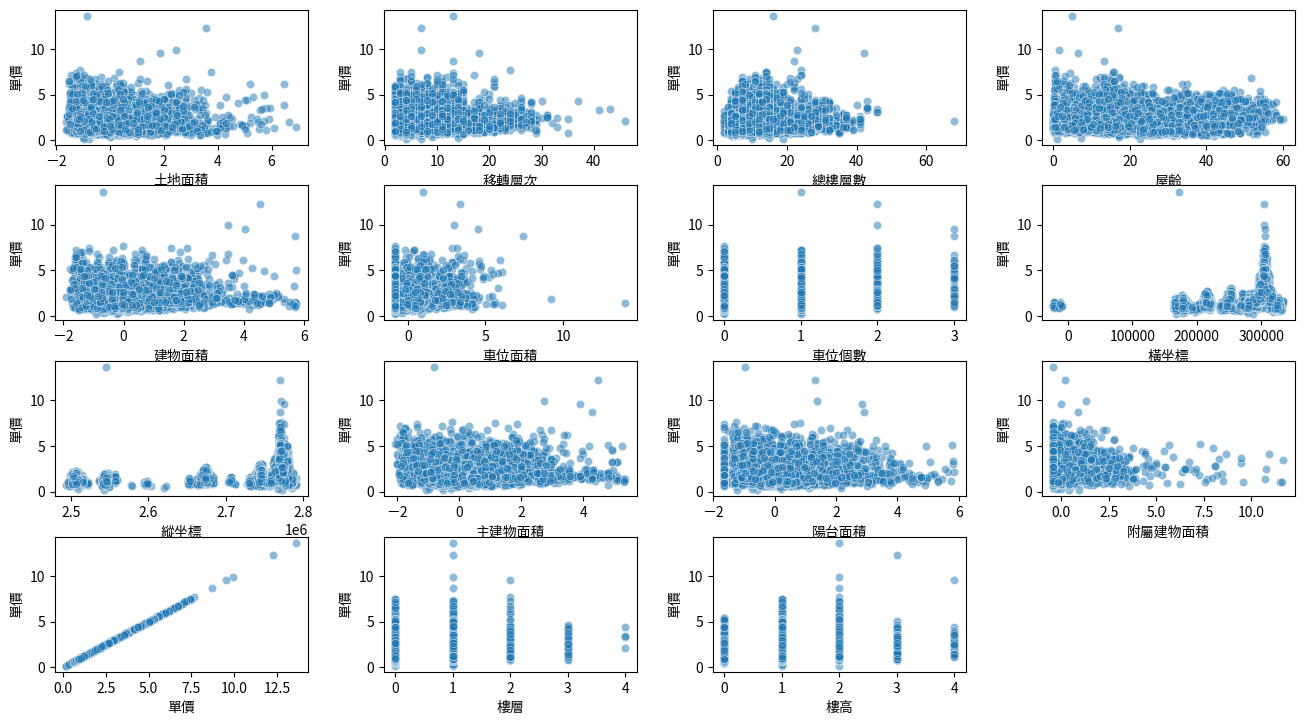

In [ ]:
#數字特徵和單價的關係
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, feature in enumerate(num_features):
    plt.subplot(9, 4, i+1)
    sns.scatterplot(x=feature, y='單價', data=df, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('單價')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '台北市'),
  Text(1, 0, '高雄市'),
  Text(2, 0, '新北市'),
  Text(3, 0, '桃園市'),
  Text(4, 0, '台中市'),
  Text(5, 0, '台南市'),
  Text(6, 0, '苗栗縣'),
  Text(7, 0, '新竹縣'),
  Text(8, 0, '基隆市'),
  Text(9, 0, '屏東縣'),
  Text(10, 0, '新竹市'),
  Text(11, 0, '宜蘭縣'),
  Text(12, 0, '花蓮縣'),
  Text(13, 0, '雲嘉地區'),
  Text(14, 0, '金門縣'),
  Text(15, 0, '彰化縣')])

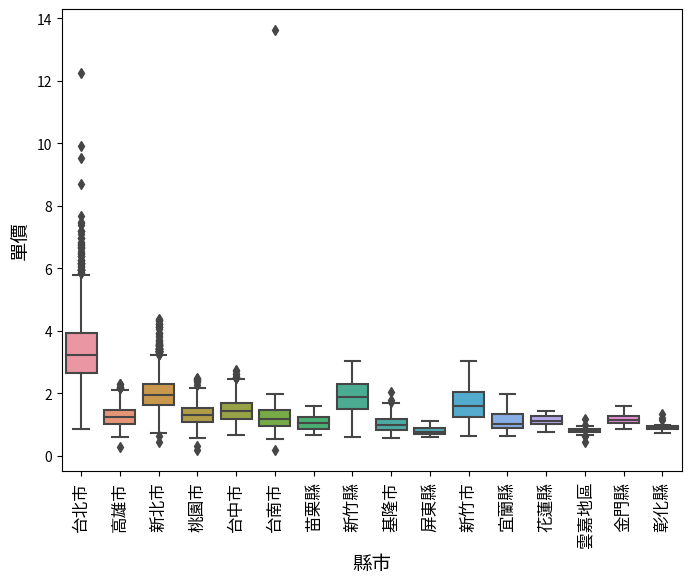

In [ ]:
#查看縣市和單價的關係
plt.figure(figsize=(8, 6))
sns.boxplot(x='縣市', y='單價', data=df)
plt.xlabel('縣市', fontsize=14)
plt.ylabel('單價', fontsize=14)
plt.xticks(rotation=90, fontsize=12)

In [87]:
df['路名'] = df['路名'].str.split('段',expand=True)[0].str.split('路',expand=True)[0]
df_t_pb['路名'] = df_t_pb['路名'].str.split('段',expand=True)[0].str.split('路',expand=True)[0]

df['路名'] = df['路名'].str.split('段',expand=True)[0].str.split('道',expand=True)[0]
df_t_pb['路名'] = df_t_pb['路名'].str.split('段',expand=True)[0].str.split('道',expand=True)[0]

df_t_pt['路名'] = df_t_pt['路名'].str.split('段',expand=True)[0].str.split('路',expand=True)[0]
df_t_pt['路名'] = df_t_pt['路名'].str.split('段',expand=True)[0].str.split('道',expand=True)[0]

In [88]:
df['地區'] = df['縣市']+df['鄉鎮市區']
df['地段'] = df['縣市']+df['鄉鎮市區']+df['路名']

df.drop('鄉鎮市區', axis=1, inplace=True)
df.drop('路名', axis=1, inplace=True)

df_t_pt['地區'] = df_t_pt['縣市']+df_t_pt['鄉鎮市區']
df_t_pt['地段'] = df_t_pt['縣市']+df_t_pt['鄉鎮市區']+df_t_pt['路名']

df_t_pt.drop('鄉鎮市區', axis=1, inplace=True)
df_t_pt.drop('路名', axis=1, inplace=True)

df_t_pb['地區'] = df_t_pb['縣市']+df_t_pb['鄉鎮市區']
df_t_pb['地段'] = df_t_pb['縣市']+df_t_pb['鄉鎮市區']+df_t_pb['路名']

df_t_pb.drop('鄉鎮市區', axis=1, inplace=True)
df_t_pb.drop('路名', axis=1, inplace=True)

df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積,單價,地區,地段
0,台北市,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,0.0,305266,2768378,0.393926,0.183700,-0.438452,4.627714,台北市大安區,台北市大安區敦化南
1,台北市,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,0.0,300677,2767990,-0.316131,0.608577,-0.438452,1.887258,台北市萬華區,台北市萬華區水源
2,高雄市,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,1.0,184815,2504666,-0.098871,-0.360620,1.525881,1.489072,高雄市鳳山區,高雄市鳳山區北忠街
3,新北市,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,1.0,296653,2772355,-0.071147,0.315088,0.231984,2.051217,新北市新莊區,新北市新莊區福前街
4,新北市,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,1.0,297377,2768472,0.791954,1.719400,-0.438452,3.269198,新北市板橋區,新北市板橋區文化
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,桃園市,0.706189,4,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),28.333333,-0.271825,0.484488,1.0,280165,2758675,0.146962,-0.181455,-0.171559,0.903505,桃園市八德區,桃園市八德區介壽
11747,新竹市,-0.225809,2,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),29.250000,-0.325832,-0.819326,0.0,247333,2743084,-0.181192,-0.067131,-0.163018,1.044041,新竹市新竹市,新竹市新竹市東南街
11748,新北市,-0.943908,15,17,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),22.833333,-0.848662,-0.819326,0.0,316680,2773938,-0.901999,-0.495421,-0.171559,2.144908,新北市汐止區,新北市汐止區建成
11749,新北市,-1.147111,12,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),25.083333,-1.199130,-0.819326,0.0,295794,2763966,-1.333408,-0.708713,-0.438452,2.285444,新北市土城區,新北市土城區學士


In [89]:
df.columns

Index(['縣市', '土地面積', '移轉層次', '總樓層數', '主要用途', '主要建材', '建物型態', '屋齡', '建物面積',
       '車位面積', '車位個數', '橫坐標', '縱坐標', '主建物面積', '陽台面積', '附屬建物面積', '單價', '地區',
       '地段'],
      dtype='object')

In [ ]:
print(df['主要建材'].value_counts())
#print(df['主要用途'].value_counts())
#print(df['建物型態'].value_counts())
#print(df['地區'].value_counts())
print(df['地段'].value_counts())

鋼筋混凝土造       10825
鋼骨造            399
加強磚造           250
其他             141
鋼筋混凝土加強磚造       12
磚造               1
Name: 主要建材, dtype: int64
新北市林口區文化三    73
新北市土城區中央     50
新北市中和區景平     47
台北市內湖區內湖     47
台北市士林區中山北    40
             ..
新北市汐止區汐平      1
台中市北區美德街      1
高雄市三民區九如二     1
台中市西區仁福街      1
桃園市八德區瑞安街     1
Name: 地段, Length: 3456, dtype: int64


In [90]:
df['主要建材'] = df['主要建材'].replace(['加強磚造', '磚造'],'磚造')
df['主要建材'] = df['主要建材'].replace(['鋼筋混凝土造', '鋼筋混凝土加強磚造'],'鋼筋混凝土造')
print(df['主要建材'].value_counts())

df_t_pb['主要建材'] = df_t_pb['主要建材'].replace(['加強磚造', '磚造'],'磚造')
df_t_pb['主要建材'] = df_t_pb['主要建材'].replace(['鋼筋混凝土造', '鋼筋混凝土加強磚造'],'鋼筋混凝土造')
print(df_t_pb['主要建材'].value_counts())

df_t_pt['主要建材'] = df_t_pt['主要建材'].replace(['加強磚造', '磚造'],'磚造')
df_t_pt['主要建材'] = df_t_pt['主要建材'].replace(['鋼筋混凝土造', '鋼筋混凝土加強磚造'],'鋼筋混凝土造')

鋼筋混凝土造    10835
鋼骨造         398
磚造          251
其他          141
Name: 主要建材, dtype: int64
鋼筋混凝土造    5500
鋼骨造        184
磚造         122
其他          70
Name: 主要建材, dtype: int64


In [91]:
# 将 "一般事务所"、"辦公室" 和 "商業用" 更新为 "商业/办公"
#df['主要用途'] = df['主要用途'].replace(['一般事務所', '商業用', '辦公室'],'商業辦公')
df['主要用途'] = df['主要用途'].replace(['其他','店鋪','廠房'],'其他')
print(df['主要用途'].value_counts())

df_t_pt['主要用途'] = df_t_pt['主要用途'].replace(['其他','店鋪','廠房'],'其他')
print(df_t['主要用途'].value_counts())
df_t_pb['主要用途'] = df_t_pb['主要用途'].replace(['其他','店鋪','廠房'],'其他')

住家用      8145
集合住宅     2642
其他        468
商業用       247
一般事務所      59
國民住宅       29
工業用        11
辦公室        11
住商用        10
住工用         3
Name: 主要用途, dtype: int64
住家用      4066
集合住宅     1350
其他        261
商業用       105
一般事務所      61
國民住宅       11
辦公室         6
住商用         6
工業用         3
店鋪          3
住工用         3
Name: 主要用途, dtype: int64


In [92]:
df['縣市'] = df['縣市'].replace(['嘉義市','嘉義縣','雲林縣'],'雲嘉')
#df['縣市'] = df['縣市'].replace(['花蓮縣', '宜蘭縣'],'宜花地區')
#df['縣市'] = df['縣市'].replace(['彰化縣', '苗栗縣'],'中部地區')
print(df['縣市'].value_counts())

df_t_pt['縣市'] = df_t_pt['縣市'].replace(['嘉義市','嘉義縣','雲林縣'],'雲嘉')
df_t_pb['縣市'] = df_t_pb['縣市'].replace(['嘉義市','嘉義縣','雲林縣'],'雲嘉')

#df['縣市'] = df['縣市'].replace(['花蓮縣', '宜蘭縣'],'宜花地區')
#df['縣市'] = df['縣市'].replace(['彰化縣', '苗栗縣'],'中部地區')
print(df_t_pt['縣市'].value_counts())

新北市    4277
台北市    2341
高雄市    1308
桃園市    1165
台中市     983
台南市     475
新竹縣     345
新竹市     243
基隆市     233
宜蘭縣      73
屏東縣      46
苗栗縣      43
雲嘉       30
金門縣      30
彰化縣      23
花蓮縣      10
Name: 縣市, dtype: int64
新北市    2122
台北市    1227
高雄市     646
桃園市     575
台中市     561
台南市     211
新竹縣     180
新竹市     128
基隆市     107
宜蘭縣      32
苗栗縣      24
屏東縣      17
雲嘉       17
金門縣      13
彰化縣      10
花蓮縣       5
Name: 縣市, dtype: int64


In [94]:
df_t_pt.isnull().sum()

縣市        0
土地面積      0
移轉層次      0
總樓層數      0
主要用途      0
主要建材      0
建物型態      0
屋齡        0
建物面積      0
車位面積      0
車位個數      0
橫坐標       0
縱坐標       0
主建物面積     0
陽台面積      0
附屬建物面積    0
地區        0
地段        0
dtype: int64

In [96]:
import pandas as pd
from pyproj import Transformer

# 創建座標轉換器
transformer = Transformer.from_crs("epsg:3826", "epsg:4326")

# 進行座標轉換
df['緯度'],df['經度'] = transformer.transform(df['橫坐標'].values, df['縱坐標'].values)
df_t_pt['緯度'],df_t_pt['經度'] = transformer.transform(df_t_pt['橫坐標'].values, df_t_pt['縱坐標'].values)
df_t_pb['緯度'],df_t_pb['經度'] = transformer.transform(df_t_pb['橫坐標'].values, df_t_pb['縱坐標'].values)
# 現在，df 包含了轉換後的經度和緯度列
print(df)

        縣市      土地面積  移轉層次  總樓層數  主要用途    主要建材             建物型態         屋齡  \
0      台北市 -0.256716    11    11   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  32.583333   
1      台北市  0.100134     7    12   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  24.166667   
2      高雄市  0.181921    10    15  集合住宅      其他  住宅大樓(11層含以上有電梯)   6.166667   
3      新北市  0.085594     9    14  集合住宅  鋼筋混凝土造  住宅大樓(11層含以上有電梯)   8.833333   
4      新北市 -0.938116    41    43   住家用     鋼骨造  住宅大樓(11層含以上有電梯)  11.000000   
...    ...       ...   ...   ...   ...     ...              ...        ...   
11746  桃園市  0.706189     4     5   住家用  鋼筋混凝土造     公寓(5樓含以下無電梯)  28.333333   
11747  新竹市 -0.225809     2     7   住家用  鋼筋混凝土造    華廈(10層含以下有電梯)  29.250000   
11748  新北市 -0.943908    15    17   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  22.833333   
11749  新北市 -1.147111    12    16   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  25.083333   
11750  新北市 -0.398154    11    27  集合住宅     鋼骨造  住宅大樓(11層含以上有電梯)   2.250000   

           建物面積      車位面積  ...     橫坐標      縱坐標     主建物面積      

In [97]:
# @title 縣市價格
# Calculate the overall mean and standard deviation

city_price_averages = {}
# Iterate through each city
for city in df['縣市'].unique():
    # Get the prices for the current city
    city_prices = df[df['縣市'] == city]['單價']
    city_mean = city_prices.mean()
    city_price_averages[city] = city_mean

df['縣市平均價格'] = df['縣市'].map(city_price_averages)
df_t_pt['縣市平均價格'] = df_t_pt['縣市'].map(city_price_averages)
df_t_pb['縣市平均價格'] = df_t_pb['縣市'].map(city_price_averages)

city_price_averages_df = pd.DataFrame(list(city_price_averages.items()), columns=['縣市', '平均單價'])
num_levels = 10
city_price_averages_df['縣市價格等級'] = pd.qcut(city_price_averages_df['平均單價'], q=num_levels, labels=False)
city_price_level_dict = dict(zip(city_price_averages_df['縣市'], city_price_averages_df['縣市價格等級']))

df['縣市價格等級'] = df['縣市'].map(city_price_level_dict)
df_t_pt['縣市價格等級'] = df_t_pt['縣市'].map(city_price_level_dict)
df_t_pb['縣市價格等級'] = df_t_pb['縣市'].map(city_price_level_dict)


,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積
0,PR-1,高雄市,前鎮區,鎮海路,-0.541033,12,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.916667,0.043596,-0.819326,0.0,179750,2499123,0.127159,0.035249,-0.438452
1,PR-2,台北市,北投區,大同街,0.753799,4,7,其他,鋼筋混凝土造,華廈(10層含以下有電梯),0.750000,-0.200582,0.311470,1.0,300436,2781335,-0.464083,-0.160979,-0.438452
2,PR-3,台北市,大同區,大龍街,0.482869,6,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),43.916667,0.211936,-0.819326,0.0,302091,2773374,0.832407,2.461656,-0.438452
3,PR-4,新北市,蘆洲區,民族路,0.390940,4,4,住家用,加強磚造,公寓(5樓含以下無電梯),45.416667,-0.685493,-0.819326,0.0,298394,2775413,0.052476,-1.642077,-0.438452
4,PR-5,新北市,新莊區,龍安路,-0.711599,3,8,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),27.250000,-0.898072,-0.819326,0.0,292572,2767887,-0.968196,-0.333319,-0.022099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,高雄市,鳳山區,和德街,-0.163249,25,25,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.500000,0.170569,1.661628,2.0,184250,2502080,-0.496050,0.946431,0.870392
5871,PR-5872,台北市,南港區,玉成街,1.118749,6,17,一般事務所,其他,住宅大樓(11層含以上有電梯),17.583333,2.489405,4.845468,3.0,308685,2771134,2.717029,1.105120,-0.130991
5872,PR-5873,新北市,林口區,文化二路一段,-0.053200,14,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.083333,-0.166110,-0.819326,0.0,287075,2773585,0.242296,-0.084194,-0.438452
5873,PR-5874,高雄市,鳳山區,文龍東路,-0.089851,2,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),4.166667,0.453817,-0.819326,0.0,185561,2504746,-0.257007,2.461656,-0.438452


In [99]:
df_t_pt

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,縱坐標,主建物面積,陽台面積,附屬建物面積,地區,地段,緯度,經度,縣市平均價格,縣市價格等級
0,高雄市,-0.541033,12,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.916667,0.043596,-0.819326,...,2499123,0.127159,0.035249,-0.438452,高雄市前鎮區,高雄市前鎮區鎮海,22.590707,120.316770,1.254901,5
1,台北市,0.753799,4,7,其他,鋼筋混凝土造,華廈(10層含以下有電梯),0.750000,-0.200582,0.311470,...,2781335,-0.464083,-0.160979,-0.438452,台北市北投區,台北市北投區大同街,25.139613,121.500226,3.371521,9
2,台北市,0.482869,6,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),43.916667,0.211936,-0.819326,...,2773374,0.832407,2.461656,-0.438452,台北市大同區,台北市大同區大龍街,25.067685,121.516338,3.371521,9
3,新北市,0.390940,4,4,住家用,磚造,公寓(5樓含以下無電梯),45.416667,-0.685493,-0.819326,...,2775413,0.052476,-1.642077,-0.438452,新北市蘆洲區,新北市蘆洲區民族,25.086216,121.479765,1.978885,9
4,新北市,-0.711599,3,8,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),27.250000,-0.898072,-0.819326,...,2767887,-0.968196,-0.333319,-0.022099,新北市新莊區,新北市新莊區龍安,25.018446,121.421816,1.978885,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,高雄市,-0.163249,25,25,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.500000,0.170569,1.661628,...,2502080,-0.496050,0.946431,0.870392,高雄市鳳山區,高雄市鳳山區和德街,22.617591,120.360410,1.254901,5
5871,台北市,1.118749,6,17,一般事務所,其他,住宅大樓(11層含以上有電梯),17.583333,2.489405,4.845468,...,2771134,2.717029,1.105120,-0.130991,台北市南港區,台北市南港區玉成街,25.047221,121.581601,3.371521,9
5872,新北市,-0.053200,14,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.083333,-0.166110,-0.819326,...,2773585,0.242296,-0.084194,-0.438452,新北市林口區,新北市林口區文化二,25.070033,121.367504,1.978885,9
5873,高雄市,-0.089851,2,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),4.166667,0.453817,-0.819326,...,2504746,-0.257007,2.461656,-0.438452,高雄市鳳山區,高雄市鳳山區文龍東,22.641717,120.373053,1.254901,5


In [29]:
import pandas as pd

# 打印包含縣市和對應等級的資料框
print(city_price_averages_df)

     縣市      平均單價  縣市價格等級
0   台北市  3.371521       9
1   高雄市  1.254901       6
2   新北市  1.978885       9
3   桃園市  1.319858       6
4   台中市  1.469629       7
5   台南市  1.233760       5
6   苗栗縣  1.078903       3
7   新竹縣  1.840128       8
8   基隆市  1.036863       2
9   屏東縣  0.791844       0
10  新竹市  1.667037       8
11  宜蘭縣  1.100223       3
12  花蓮縣  1.109624       4
13   嘉義  0.815669       1
14  金門縣  1.171773       4
15  彰化縣  0.927538       1
16  雲林縣  0.528741       0


In [101]:
missing_prices = df_t_pt[df_t_pt['縣市價格等級'].isnull()]
print(missing_prices)
print(df_t_pt['縣市價格等級'].value_counts())

Empty DataFrame
Columns: [縣市, 土地面積, 移轉層次, 總樓層數, 主要用途, 主要建材, 建物型態, 屋齡, 建物面積, 車位面積, 車位個數, 橫坐標, 縱坐標, 主建物面積, 陽台面積, 附屬建物面積, 地區, 地段, 緯度, 經度, 縣市平均價格, 縣市價格等級]
Index: []

[0 rows x 22 columns]
9    3349
5     857
7     689
6     575
8     180
1     117
3      37
0      34
2      24
4      13
Name: 縣市價格等級, dtype: int64


In [102]:
# @title 地區價格
from numpy.ma.extras import unique
import pandas as pd
import numpy as np

area_price_averages = {}

for area in df['地區'].unique():
   area_prices = df[df['地區'] == area]['單價']
   area_mean = area_prices.mean()
   area_price_averages[area] = area_mean

df['地區平均價格'] = df['地區'].map(area_price_averages)
df_t_pt['地區平均價格'] = df_t_pt['地區'].map(area_price_averages)
df_t_pb['地區平均價格'] = df_t_pb['地區'].map(area_price_averages)

area_price_averages_df = pd.DataFrame(list(area_price_averages.items()), columns=['地區', '平均單價'])
num_levels = 20
area_price_averages_df['地區價格等級'] = pd.qcut(area_price_averages_df['平均單價'], q=num_levels, labels=False)
area_price_level_dict = dict(zip(area_price_averages_df['地區'], area_price_averages_df['地區價格等級']))

df['地區價格等級'] = df['地區'].map(area_price_level_dict)
df_t_pt['地區價格等級'] = df_t_pt['地區'].map(area_price_level_dict)
df_t_pb['地區價格等級'] = df_t_pb['地區'].map(area_price_level_dict)

df_t
# Print the resulting '縣市' and '縣市價格' for the testing dataset
#print(df_t[['地區', '地區價格_縣市內']].drop_duplicates())


,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積
0,PR-1,高雄市,前鎮區,鎮海路,-0.541033,12,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.916667,0.043596,-0.819326,0.0,179750,2499123,0.127159,0.035249,-0.438452
1,PR-2,台北市,北投區,大同街,0.753799,4,7,其他,鋼筋混凝土造,華廈(10層含以下有電梯),0.750000,-0.200582,0.311470,1.0,300436,2781335,-0.464083,-0.160979,-0.438452
2,PR-3,台北市,大同區,大龍街,0.482869,6,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),43.916667,0.211936,-0.819326,0.0,302091,2773374,0.832407,2.461656,-0.438452
3,PR-4,新北市,蘆洲區,民族路,0.390940,4,4,住家用,加強磚造,公寓(5樓含以下無電梯),45.416667,-0.685493,-0.819326,0.0,298394,2775413,0.052476,-1.642077,-0.438452
4,PR-5,新北市,新莊區,龍安路,-0.711599,3,8,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),27.250000,-0.898072,-0.819326,0.0,292572,2767887,-0.968196,-0.333319,-0.022099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,高雄市,鳳山區,和德街,-0.163249,25,25,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.500000,0.170569,1.661628,2.0,184250,2502080,-0.496050,0.946431,0.870392
5871,PR-5872,台北市,南港區,玉成街,1.118749,6,17,一般事務所,其他,住宅大樓(11層含以上有電梯),17.583333,2.489405,4.845468,3.0,308685,2771134,2.717029,1.105120,-0.130991
5872,PR-5873,新北市,林口區,文化二路一段,-0.053200,14,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.083333,-0.166110,-0.819326,0.0,287075,2773585,0.242296,-0.084194,-0.438452
5873,PR-5874,高雄市,鳳山區,文龍東路,-0.089851,2,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),4.166667,0.453817,-0.819326,0.0,185561,2504746,-0.257007,2.461656,-0.438452


In [ ]:
import pandas as pd

# 打印包含縣市和對應等級的資料框
print(area_price_averages_df)

         地區      平均單價  地區價格等級
0    台北市大安區  4.524506      19
1    台北市萬華區  2.521631      18
2    高雄市鳳山區  1.088689       6
3    新北市新莊區  1.992058      17
4    新北市板橋區  2.326760      17
..      ...       ...     ...
124  台中市清水區  0.973773       3
125  新北市瑞芳區  0.622432       0
126  雲林縣虎尾鎮  0.622432       0
127  台中市大肚區  1.348536      13
128  台南市新營區  0.657566       0

[129 rows x 3 columns]


In [32]:
missing_prices = df_t[df_t['地區價格等級'].isnull()]
print(missing_prices)

       縣市      土地面積  移轉層次  總樓層數  主要用途    主要建材             建物型態         屋齡  \
3054  高雄市 -0.431344     2    19   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  28.416667   
3824  台中市  0.548745     2     9   住家用  鋼筋混凝土造    華廈(10層含以下有電梯)   9.083333   
4494  高雄市  0.712750     2     5  集合住宅  鋼筋混凝土造     公寓(5樓含以下無電梯)   0.750000   

          建物面積      車位面積  ...  樓層  樓高      地區        地段         緯度  \
3054 -0.109231 -0.819326  ...   0   2  高雄市大社區  高雄市大社區翠屏  22.728760   
3824 -0.249993  0.170893  ...   0   1  台中市沙鹿區  台中市沙鹿區向上  24.201824   
4494 -0.730881 -0.124164  ...   0   0  高雄市大寮區  高雄市大寮區黃厝  22.617191   

              經度    縣市平均價格  縣市價格等級 地區平均價格 地區價格等級  
3054  120.351756  1.254901       6    NaN    NaN  
3824  120.570154  1.469629       7    NaN    NaN  
4494  120.409185  1.254901       6    NaN    NaN  

[3 rows x 26 columns]


In [103]:
similar_street_count = 0  # Initialize a global counter
similar_city_count = 0
import math

def haversine(lat1, lon1, lat2, lon2):
    # 將經度和緯度從度轉換為弧度
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # 地球半徑（千米）
    radius = 6371.0

    # 計算距離
    distance = radius * c
    return distance

def fill_missing_prices(row):
    if pd.isna(row['地區平均價格']):
        similar_street = df[
            (df['縣市'] == row['縣市']) &
            (df['地區'] != row['地區'])]

        # 進行座標轉換
        lon, lat = transformer.transform(row['橫坐標'], row['縱坐標'])

        # 計算與目標資料點的距離
        similar_street['距離'] = similar_street.apply(
            lambda x: haversine(lat, lon, x['緯度'], x['經度']), axis=1)

        # 找到最近的相似地段
        nearest_similar = similar_street.loc[similar_street['距離'].idxmin(), '地區平均價格']
        print(similar_street['地區'][:5])

        if not pd.isna(nearest_similar):
            return nearest_similar

    return row['地區平均價格']

df_t_pt['地區平均價格'] = df_t_pt.apply(fill_missing_prices, axis=1)
df_t_pb['地區平均價格'] = df_t_pb.apply(fill_missing_prices, axis=1)

2     高雄市鳳山區
23    高雄市三民區
32    高雄市前金區
57    高雄市新興區
74    高雄市鼓山區
Name: 地區, dtype: object
11     台中市南區
13    台中市南屯區
16    台中市西屯區
30    台中市西屯區
42    台中市北屯區
Name: 地區, dtype: object
2     高雄市鳳山區
23    高雄市三民區
32    高雄市前金區
57    高雄市新興區
74    高雄市鼓山區
Name: 地區, dtype: object
2     高雄市鳳山區
23    高雄市三民區
32    高雄市前金區
57    高雄市新興區
74    高雄市鼓山區
Name: 地區, dtype: object
43      苗栗縣頭份市
924     苗栗縣竹南鎮
1207    苗栗縣竹南鎮
1227    苗栗縣頭份市
1467    苗栗縣竹南鎮
Name: 地區, dtype: object
7     桃園市平鎮區
9     桃園市中壢區
24    桃園市桃園區
28    桃園市八德區
34    桃園市中壢區
Name: 地區, dtype: object
3     新北市新莊區
4     新北市板橋區
6     新北市樹林區
8     新北市永和區
10    新北市泰山區
Name: 地區, dtype: object
11     台中市南區
13    台中市南屯區
16    台中市西屯區
30    台中市西屯區
42    台中市北屯區
Name: 地區, dtype: object
36    台南市新市區
56    台南市永康區
61    台南市安平區
66    台南市永康區
83    台南市安南區
Name: 地區, dtype: object
43      苗栗縣頭份市
924     苗栗縣竹南鎮
1207    苗栗縣竹南鎮
1227    苗栗縣頭份市
1467    苗栗縣竹南鎮
Name: 地區, dtype: object
43      苗栗縣頭份市
924     苗栗縣竹南鎮
1207    苗栗縣竹南鎮
1227    苗栗縣頭份市
1467    苗栗縣竹南鎮
Name: 地區, dtype

In [104]:
def fill_missing_prices(row):
    if pd.isna(row['地區價格等級']):
        similar_street = df[
            (df['縣市'] == row['縣市']) &
            (df['地區'] != row['地區'])]

        # 進行座標轉換
        lon, lat = transformer.transform(row['橫坐標'], row['縱坐標'])

        # 計算與目標資料點的距離
        similar_street['距離'] = similar_street.apply(
            lambda x: haversine(lat, lon, x['緯度'], x['經度']), axis=1)

        # 找到最近的相似地段
        nearest_similar = similar_street.loc[similar_street['距離'].idxmin(), '地區價格等級']
        print(similar_street['地區'][:5])

        if not pd.isna(nearest_similar):
            return nearest_similar

    return row['地區價格等級']

df_t_pt['地區價格等級'] = df_t_pt.apply(fill_missing_prices, axis=1)
df_t_pb['地區價格等級'] = df_t_pb.apply(fill_missing_prices, axis=1)

2     高雄市鳳山區
23    高雄市三民區
32    高雄市前金區
57    高雄市新興區
74    高雄市鼓山區
Name: 地區, dtype: object
11     台中市南區
13    台中市南屯區
16    台中市西屯區
30    台中市西屯區
42    台中市北屯區
Name: 地區, dtype: object
2     高雄市鳳山區
23    高雄市三民區
32    高雄市前金區
57    高雄市新興區
74    高雄市鼓山區
Name: 地區, dtype: object
2     高雄市鳳山區
23    高雄市三民區
32    高雄市前金區
57    高雄市新興區
74    高雄市鼓山區
Name: 地區, dtype: object
43      苗栗縣頭份市
924     苗栗縣竹南鎮
1207    苗栗縣竹南鎮
1227    苗栗縣頭份市
1467    苗栗縣竹南鎮
Name: 地區, dtype: object
7     桃園市平鎮區
9     桃園市中壢區
24    桃園市桃園區
28    桃園市八德區
34    桃園市中壢區
Name: 地區, dtype: object
3     新北市新莊區
4     新北市板橋區
6     新北市樹林區
8     新北市永和區
10    新北市泰山區
Name: 地區, dtype: object
11     台中市南區
13    台中市南屯區
16    台中市西屯區
30    台中市西屯區
42    台中市北屯區
Name: 地區, dtype: object
36    台南市新市區
56    台南市永康區
61    台南市安平區
66    台南市永康區
83    台南市安南區
Name: 地區, dtype: object
43      苗栗縣頭份市
924     苗栗縣竹南鎮
1207    苗栗縣竹南鎮
1227    苗栗縣頭份市
1467    苗栗縣竹南鎮
Name: 地區, dtype: object
43      苗栗縣頭份市
924     苗栗縣竹南鎮
1207    苗栗縣竹南鎮
1227    苗栗縣頭份市
1467    苗栗縣竹南鎮
Name: 地區, dtype

In [35]:
df_t['地區價格等級'].value_counts()

17.0    1325
19.0     819
16.0     668
18.0     509
13.0     418
12.0     346
15.0     334
14.0     262
8.0      232
10.0     195
9.0      169
6.0      157
7.0      134
11.0      89
2.0       60
4.0       49
3.0       37
5.0       36
1.0       36
Name: 地區價格等級, dtype: int64

In [36]:
print(df_t['地區價格等級'].isnull().sum())
print(df_t['地區平均價格'].isnull().sum())

0
0


In [37]:
missing_prices = df_t[df_t['地區平均價格'].isnull()]
print(missing_prices)
print(df_t[['地區', '地區價格等級']].drop_duplicates())

Empty DataFrame
Columns: [縣市, 土地面積, 移轉層次, 總樓層數, 主要用途, 主要建材, 建物型態, 屋齡, 建物面積, 車位面積, 車位個數, 橫坐標, 縱坐標, 主建物面積, 陽台面積, 附屬建物面積, 樓層, 樓高, 地區, 地段, 緯度, 經度, 縣市平均價格, 縣市價格等級, 地區平均價格, 地區價格等級]
Index: []

[0 rows x 26 columns]
          地區  地區價格等級
0     高雄市前鎮區     9.0
1     台北市北投區    18.0
2     台北市大同區    18.0
3     新北市蘆洲區    17.0
4     新北市新莊區    17.0
...      ...     ...
3824  台中市沙鹿區    11.0
4221  台中市大肚區    13.0
4427  新竹縣寶山鄉    11.0
4494  高雄市大寮區     2.0
5287  宜蘭縣頭城鎮    15.0

[116 rows x 2 columns]


In [106]:
# @title 地段平均價格
from numpy.ma.extras import unique
import pandas as pd
import numpy as np

street_price_averages = {}

for street in df['地段'].unique():
   street_prices = df[df['地段'] == street]['單價']
   street_mean = street_prices.mean()
   street_price_averages[street] = street_mean

df['地段平均價格'] = df['地段'].map(street_price_averages)
df_t_pt['地段平均價格'] = df_t_pt['地段'].map(street_price_averages)
df_t_pb['地段平均價格'] = df_t_pb['地段'].map(street_price_averages)

street_price_averages_df = pd.DataFrame(list(street_price_averages.items()), columns=['地段', '平均單價'])
num_levels = 30
street_price_averages_df['地段價格等級'] = pd.qcut(street_price_averages_df['平均單價'], q=num_levels, labels=False)
street_price_level_dict = dict(zip(street_price_averages_df['地段'], street_price_averages_df['地段價格等級']))

df['地段價格等級'] = df['地段'].map(street_price_level_dict)
df_t_pt['地段價格等級'] = df_t_pt['地段'].map(street_price_level_dict)
df_t_pb['地段價格等級'] = df_t_pb['地段'].map(street_price_level_dict)

df_t

,ID,縣市,鄉鎮市區,路名,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,車位個數,橫坐標,縱坐標,主建物面積,陽台面積,附屬建物面積
0,PR-1,高雄市,前鎮區,鎮海路,-0.541033,12,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.916667,0.043596,-0.819326,0.0,179750,2499123,0.127159,0.035249,-0.438452
1,PR-2,台北市,北投區,大同街,0.753799,4,7,其他,鋼筋混凝土造,華廈(10層含以下有電梯),0.750000,-0.200582,0.311470,1.0,300436,2781335,-0.464083,-0.160979,-0.438452
2,PR-3,台北市,大同區,大龍街,0.482869,6,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),43.916667,0.211936,-0.819326,0.0,302091,2773374,0.832407,2.461656,-0.438452
3,PR-4,新北市,蘆洲區,民族路,0.390940,4,4,住家用,加強磚造,公寓(5樓含以下無電梯),45.416667,-0.685493,-0.819326,0.0,298394,2775413,0.052476,-1.642077,-0.438452
4,PR-5,新北市,新莊區,龍安路,-0.711599,3,8,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),27.250000,-0.898072,-0.819326,0.0,292572,2767887,-0.968196,-0.333319,-0.022099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,PR-5871,高雄市,鳳山區,和德街,-0.163249,25,25,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.500000,0.170569,1.661628,2.0,184250,2502080,-0.496050,0.946431,0.870392
5871,PR-5872,台北市,南港區,玉成街,1.118749,6,17,一般事務所,其他,住宅大樓(11層含以上有電梯),17.583333,2.489405,4.845468,3.0,308685,2771134,2.717029,1.105120,-0.130991
5872,PR-5873,新北市,林口區,文化二路一段,-0.053200,14,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.083333,-0.166110,-0.819326,0.0,287075,2773585,0.242296,-0.084194,-0.438452
5873,PR-5874,高雄市,鳳山區,文龍東路,-0.089851,2,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),4.166667,0.453817,-0.819326,0.0,185561,2504746,-0.257007,2.461656,-0.438452


In [39]:
missing_prices = df_t[df_t['地段平均價格'].isnull()]
print(missing_prices)

       縣市      土地面積  移轉層次  總樓層數  主要用途    主要建材             建物型態         屋齡  \
0     高雄市 -0.541033    12    14   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)  27.916667   
2     台北市  0.482869     6     7   住家用  鋼筋混凝土造    華廈(10層含以下有電梯)  43.916667   
6     高雄市 -0.640027    13    13   住家用  鋼筋混凝土造  住宅大樓(11層含以上有電梯)   9.500000   
11    新北市  1.840405     4     5   住家用  鋼筋混凝土造     公寓(5樓含以下無電梯)  34.750000   
33    宜蘭縣 -0.033973     2     8   住家用  鋼筋混凝土造    華廈(10層含以下有電梯)  27.416667   
...   ...       ...   ...   ...   ...     ...              ...        ...   
5827  高雄市 -0.786175     2    15  集合住宅  鋼筋混凝土造  住宅大樓(11層含以上有電梯)   0.500000   
5832  基隆市  0.889132     2     4   住家用  鋼筋混凝土造     公寓(5樓含以下無電梯)  41.666667   
5833  宜蘭縣  0.771728     2     5   住家用  鋼筋混凝土造     公寓(5樓含以下無電梯)  28.666667   
5841  台中市 -0.546272    14    15  集合住宅  鋼筋混凝土造  住宅大樓(11層含以上有電梯)   3.583333   
5860  桃園市  0.474745     2     4   住家用  鋼筋混凝土造     公寓(5樓含以下無電梯)  40.083333   

          建物面積      車位面積  ...      地區          地段         緯度          經度  \

In [107]:
import math

def haversine(lat1, lon1, lat2, lon2):
    # 將經度和緯度從度轉換為弧度
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine公式
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # 地球半徑（千米）
    radius = 6371.0

    # 計算距離
    distance = radius * c
    return distance

def fill_missing_prices(row):
    if pd.isna(row['地段平均價格']):
        similar_street = df[
            (df['縣市'] == row['縣市']) &
            (df['地段'] != row['地段'])]

        # 進行座標轉換
        lon, lat = transformer.transform(row['橫坐標'], row['縱坐標'])

        # 計算與目標資料點的距離
        similar_street['距離'] = similar_street.apply(
            lambda x: haversine(lat, lon, x['緯度'], x['經度']), axis=1)

        # 找到最近的相似地段
        nearest_similar = similar_street.loc[similar_street['距離'].idxmin(), '地段平均價格']

        if not pd.isna(nearest_similar):
            return nearest_similar

    return row['地段平均價格']

df_t_pt['地段平均價格'] = df_t_pt.apply(fill_missing_prices, axis=1)
df_t_pb['地段平均價格'] = df_t_pb.apply(fill_missing_prices, axis=1)




In [108]:
def fill_missing_prices(row):
    if pd.isna(row['地段價格等級']):
        similar_street = df[
            (df['縣市'] == row['縣市']) &
            (df['地段'] != row['地段'])]

        # 進行座標轉換
        lon, lat = transformer.transform(row['橫坐標'], row['縱坐標'])

        # 計算與目標資料點的距離
        similar_street['距離'] = similar_street.apply(
            lambda x: haversine(lat, lon, x['緯度'], x['經度']), axis=1)

        # 找到最近的相似地段
        nearest_similar = similar_street.loc[similar_street['距離'].idxmin(), '地段價格等級']

        if not pd.isna(nearest_similar):
            return nearest_similar

    return row['地段價格等級']

df_t_pt['地段價格等級'] = df_t_pt.apply(fill_missing_prices, axis=1)

df_t_pb['地段價格等級'] = df_t_pb.apply(fill_missing_prices, axis=1)


In [42]:
print(df_t['地段價格等級'].isnull().sum())
print(df_t['地段平均價格'].isnull().sum())

0
0


In [43]:
df_t['地段價格等級'].value_counts()

29.0    394
28.0    327
27.0    312
22.0    308
24.0    302
21.0    289
16.0    286
26.0    284
11.0    283
25.0    277
23.0    248
18.0    228
0.0     197
20.0    196
1.0     193
17.0    168
13.0    151
10.0    149
7.0     146
14.0    140
15.0    140
12.0    137
5.0     115
19.0    115
9.0     103
8.0     102
4.0      91
2.0      69
6.0      67
3.0      58
Name: 地段價格等級, dtype: int64

In [44]:
df_t

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,地區,地段,緯度,經度,縣市平均價格,縣市價格等級,地區平均價格,地區價格等級,地段平均價格,地段價格等級
0,高雄市,-0.541033,12,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.916667,0.043596,-0.819326,...,高雄市前鎮區,高雄市前鎮區鎮海,22.590707,120.316770,1.254901,6,1.219609,9.0,0.816841,1.0
1,台北市,0.753799,4,7,其他,鋼筋混凝土造,華廈(10層含以下有電梯),0.750000,-0.200582,0.311470,...,台北市北投區,台北市北投區大同街,25.139613,121.500226,3.371521,9,2.587501,18.0,2.244454,24.0
2,台北市,0.482869,6,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),43.916667,0.211936,-0.819326,...,台北市大同區,台北市大同區大龍街,25.067685,121.516338,3.371521,9,2.976688,18.0,2.332290,25.0
3,新北市,0.390940,4,4,住家用,磚造,公寓(5樓含以下無電梯),45.416667,-0.685493,-0.819326,...,新北市蘆洲區,新北市蘆洲區民族,25.086216,121.479765,1.978885,9,1.964811,17.0,1.699877,18.0
4,新北市,-0.711599,3,8,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),27.250000,-0.898072,-0.819326,...,新北市新莊區,新北市新莊區龍安,25.018446,121.421816,1.978885,9,1.994464,17.0,2.060586,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,高雄市,-0.163249,25,25,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.500000,0.170569,1.661628,...,高雄市鳳山區,高雄市鳳山區和德街,22.617591,120.360410,1.254901,6,1.091864,6.0,1.375472,13.0
5871,台北市,1.118749,6,17,一般事務所,其他,住宅大樓(11層含以上有電梯),17.583333,2.489405,4.845468,...,台北市南港區,台北市南港區玉成街,25.047221,121.581601,3.371521,9,3.320390,19.0,3.376273,28.0
5872,新北市,-0.053200,14,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.083333,-0.166110,-0.819326,...,新北市林口區,新北市林口區文化二,25.070033,121.367504,1.978885,9,1.813507,16.0,1.670943,18.0
5873,高雄市,-0.089851,2,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),4.166667,0.453817,-0.819326,...,高雄市鳳山區,高雄市鳳山區文龍東,22.641717,120.373053,1.254901,6,1.091864,6.0,1.236107,10.0


In [109]:
#分離數字特徵和類別特徵
num_features = []
cate_features = []
for col in df.columns:
    if df[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)
print('number of numeric features:', len(num_features))
print('number of categorical features:', len(cate_features))

number of numeric features: 21
number of categorical features: 6


In [110]:
corrmat= df.corr()
corrmat['單價'].abs().sort_values(ascending=False)

<ipython-input-110-96e5485b1f5a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat= df.corr()


單價        1.000000
地段平均價格    0.933437
地區平均價格    0.856367
地段價格等級    0.807329
縣市平均價格    0.780359
地區價格等級    0.664069
縣市價格等級    0.542802
經度        0.463606
橫坐標       0.463165
縱坐標       0.400494
緯度        0.400404
附屬建物面積    0.105790
車位面積      0.068449
屋齡        0.053799
移轉層次      0.049577
土地面積      0.036383
總樓層數      0.029737
建物面積      0.023440
主建物面積     0.020612
車位個數      0.009282
陽台面積      0.009105
Name: 單價, dtype: float64

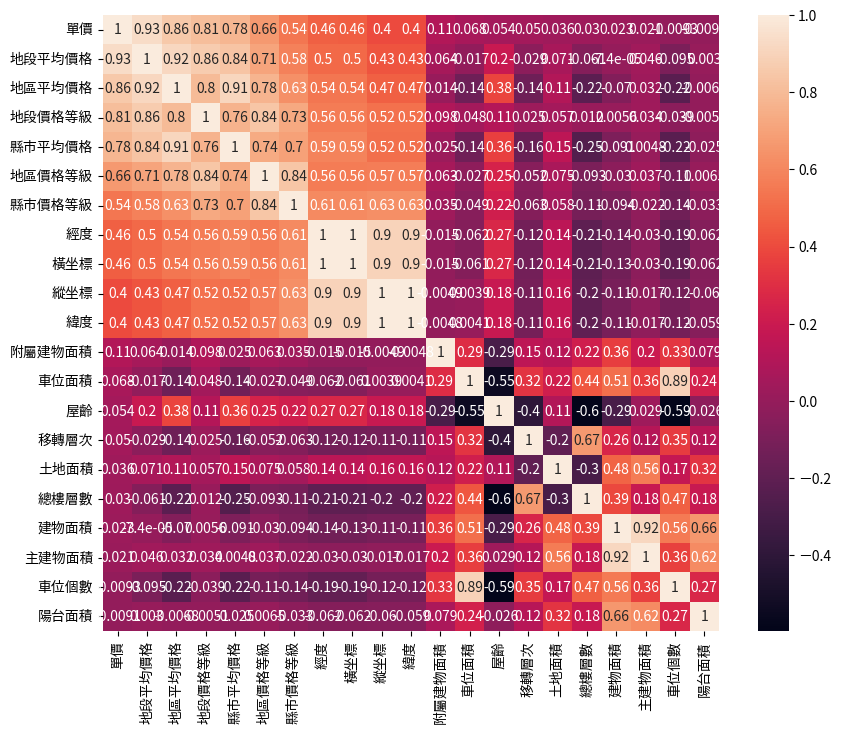

In [114]:
k=23
corrmat[corrmat['單價'].abs() > 0.5]['單價']
cols = corrmat['單價'].abs().nlargest(k)
cols=cols.index.to_list()
cm = df[cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,square=True)
plt.show()

In [111]:
df_t_pb

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,地區,地段,緯度,經度,縣市平均價格,縣市價格等級,地區平均價格,地區價格等級,地段平均價格,地段價格等級
0,新北市,2.039378,3,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),13.916667,0.472202,0.146176,...,新北市樹林區,新北市樹林區大有,24.949745,121.383684,1.978885,9,1.633987,15.0,0.762968,0.0
1,新北市,-0.077786,5,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),40.833333,-0.546455,-0.819326,...,新北市三重區,新北市三重區力行,25.068862,121.483236,1.978885,9,2.098421,17.0,1.741517,19.0
2,新北市,-0.555766,2,20,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.333333,0.124032,-0.167419,...,新北市板橋區,新北市板橋區民生,25.029321,121.465730,1.978885,9,2.326760,17.0,2.571050,26.0
3,新北市,-0.744838,6,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.500000,-0.027072,0.115280,...,新北市泰山區,新北市泰山區明志,25.047981,121.426912,1.978885,9,1.600318,15.0,1.548033,16.0
4,台北市,-0.610923,3,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),40.500000,-0.863600,-0.819326,...,台北市信義區,台北市信義區忠孝東,25.038992,121.575795,3.371521,9,3.596759,19.0,4.385680,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,台南市,0.560113,5,5,集合住宅,鋼筋混凝土造,公寓(5樓含以下無電梯),0.833333,-0.788335,-0.016028,...,台南市中西區,台南市中西區中華西,23.005809,120.187896,1.233760,5,1.283295,11.0,1.472676,15.0
5872,台中市,-1.020142,5,22,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),3.416667,-0.910137,0.799628,...,台中市北區,台中市北區育樂街,24.158104,120.693103,1.469629,7,1.342205,13.0,1.665914,18.0
5873,新北市,-0.662691,10,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),12.583333,-0.459699,0.004054,...,新北市新店區,新北市新店區安康,24.959230,121.511111,1.978885,9,2.218318,17.0,1.749650,19.0
5874,台北市,0.513752,2,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),36.250000,0.357294,-0.819326,...,台北市信義區,台北市信義區忠孝東,25.042611,121.583046,3.371521,9,3.596759,19.0,4.385680,29.0


In [112]:
df_t_pt

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,地區,地段,緯度,經度,縣市平均價格,縣市價格等級,地區平均價格,地區價格等級,地段平均價格,地段價格等級
0,高雄市,-0.541033,12,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.916667,0.043596,-0.819326,...,高雄市前鎮區,高雄市前鎮區鎮海,22.590707,120.316770,1.254901,5,1.219609,9.0,0.816841,1.0
1,台北市,0.753799,4,7,其他,鋼筋混凝土造,華廈(10層含以下有電梯),0.750000,-0.200582,0.311470,...,台北市北投區,台北市北投區大同街,25.139613,121.500226,3.371521,9,2.587501,18.0,2.244454,24.0
2,台北市,0.482869,6,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),43.916667,0.211936,-0.819326,...,台北市大同區,台北市大同區大龍街,25.067685,121.516338,3.371521,9,2.976688,18.0,2.332290,25.0
3,新北市,0.390940,4,4,住家用,磚造,公寓(5樓含以下無電梯),45.416667,-0.685493,-0.819326,...,新北市蘆洲區,新北市蘆洲區民族,25.086216,121.479765,1.978885,9,1.964811,17.0,1.699877,18.0
4,新北市,-0.711599,3,8,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),27.250000,-0.898072,-0.819326,...,新北市新莊區,新北市新莊區龍安,25.018446,121.421816,1.978885,9,1.994464,17.0,2.060586,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,高雄市,-0.163249,25,25,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),1.500000,0.170569,1.661628,...,高雄市鳳山區,高雄市鳳山區和德街,22.617591,120.360410,1.254901,5,1.091864,6.0,1.375472,13.0
5871,台北市,1.118749,6,17,一般事務所,其他,住宅大樓(11層含以上有電梯),17.583333,2.489405,4.845468,...,台北市南港區,台北市南港區玉成街,25.047221,121.581601,3.371521,9,3.320390,19.0,3.376273,28.0
5872,新北市,-0.053200,14,14,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),27.083333,-0.166110,-0.819326,...,新北市林口區,新北市林口區文化二,25.070033,121.367504,1.978885,9,1.813507,16.0,1.670943,18.0
5873,高雄市,-0.089851,2,15,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),4.166667,0.453817,-0.819326,...,高雄市鳳山區,高雄市鳳山區文龍東,22.641717,120.373053,1.254901,5,1.091864,6.0,1.236107,10.0


In [ ]:
# @title 捷運站點資料
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree

metro_df = pd.read_csv("/content/drive/MyDrive/永豐/捷運站點資料.csv",encoding='utf-8')
metro_df

,站點UID,站點ID,站點名稱,站點地址,假日自行車進出與否,lat,lng
0,TRTC-R23,R23,復興崗,112054臺北市北投區中央北路3段53巷10號,True,25.137497,121.485456
1,TRTC-R24,R24,忠義,112017臺北市北投區中央北路4段301號,True,25.130923,121.473298
2,TRTC-R25,R25,關渡,112021臺北市北投區大度路3段296巷51號,True,25.125510,121.467000
3,TRTC-R26,R26,竹圍,251033新北市淡水區民權路50號,True,25.136900,121.459550
4,TRTC-R27,R27,紅樹林,251033新北市淡水區中正東路2段68號,True,25.153990,121.458800
...,...,...,...,...,...,...,...
234,KLRT-C33,C33,衛生局站,凱旋二路與凱旋二路81巷,False,22.625200,120.323700
235,KLRT-C34,C34,五權國小站,凱旋二路與三多二路口,False,22.621210,120.325200
236,KLRT-C35,C35,凱旋武昌站,凱旋三路與武昌路口,False,22.616930,120.326900
237,KLRT-C36,C36,凱旋二聖站,凱旋三路與二聖路口,False,22.612530,120.327200


In [ ]:
import pyproj
import pandas as pd

# 定义WGS84和TWD97的坐标系统
wgs84 = pyproj.Proj(init='epsg:4326')  # WGS84坐标系统
twd97 = pyproj.Proj(init='epsg:3826')  # TWD97二度分带坐标系统

# 读取包含经度和纬度的数据集
# 假设数据集的经度列名为 'Longitude'，纬度列名为 'Latitude'，数据集名为 df
# 请根据你的数据集进行相应更改

# 使用 apply 方法执行坐标转换
def convert_to_twd97(row):
    lng, lat = row['lng'], row['lat']
    twd97_x, twd97_y = pyproj.transform(wgs84, twd97, lng, lat)
    return twd97_x, twd97_y

# 将转换后的坐标添加到数据集
metro_df['橫座標'], metro_df['縱座標'] = zip(*metro_df.apply(convert_to_twd97, axis=1))

metro_df


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-115-175a4fd19abc>:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  twd97_x, twd97_y = pyproj.transform(wgs84, twd97,

,站點UID,站點ID,站點名稱,站點地址,假日自行車進出與否,lat,lng,橫座標,縱座標
0,TRTC-R23,R23,復興崗,112054臺北市北投區中央北路3段53巷10號,True,25.137497,121.485456,298947.629587,2.781095e+06
1,TRTC-R24,R24,忠義,112017臺北市北投區中央北路4段301號,True,25.130923,121.473298,297724.297732,2.780363e+06
2,TRTC-R25,R25,關渡,112021臺北市北投區大度路3段296巷51號,True,25.125510,121.467000,297091.314456,2.779761e+06
3,TRTC-R26,R26,竹圍,251033新北市淡水區民權路50號,True,25.136900,121.459550,296335.763814,2.781020e+06
4,TRTC-R27,R27,紅樹林,251033新北市淡水區中正東路2段68號,True,25.153990,121.458800,296253.700189,2.782913e+06
...,...,...,...,...,...,...,...,...,...
234,KLRT-C33,C33,衛生局站,凱旋二路與凱旋二路81巷,False,22.625200,120.323700,180479.866066,2.502939e+06
235,KLRT-C34,C34,五權國小站,凱旋二路與三多二路口,False,22.621210,120.325200,180632.061595,2.502497e+06
236,KLRT-C35,C35,凱旋武昌站,凱旋三路與武昌路口,False,22.616930,120.326900,180804.682056,2.502022e+06
237,KLRT-C36,C36,凱旋二聖站,凱旋三路與二聖路口,False,22.612530,120.327200,180833.323225,2.501535e+06


In [ ]:

# 提取房屋坐标
house_coordinates = df[['橫坐標','縱坐標']].values
# 提取学校坐标
metro_coordinates = metro_df[['橫座標','縱座標']].values

# 使用BallTree构建学校数据的空间索引
metro_tree = BallTree(metro_coordinates, leaf_size=15)

# 设置附近学校的半径范围
radius = 1000  # 根据实际情况调整半径范围

# 查询附近学校
distances, indices = metro_tree.query(house_coordinates, k=10, return_distance=True, dualtree=True)

# 计算距离最近学校的距离
df['距離最近學校'] = distances

# 根据距离设定阈值，计算附近学校的数量
nearby_metro_count = np.sum(distances < radius, axis=1)
df['附近捷運站點數量'] = nearby_metro_count

df['附近捷運站點數量'].value_counts()


0     6153
1     1662
2     1659
3     1014
4      582
5      387
6      142
7       85
8       40
9       25
10       2
Name: 附近捷運站點數量, dtype: int64

In [48]:
df

,縣市,土地面積,移轉層次,總樓層數,主要用途,主要建材,建物型態,屋齡,建物面積,車位面積,...,地區,地段,緯度,經度,縣市平均價格,縣市價格等級,地區平均價格,地區價格等級,地段平均價格,地段價格等級
0,台北市,-0.256716,11,11,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),32.583333,-0.174154,-0.819326,...,台北市大安區,台北市大安區敦化南,25.022469,121.547608,3.371521,9,4.415937,19,4.634843,29
1,台北市,0.100134,7,12,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),24.166667,0.314204,-0.819326,...,台北市萬華區,台北市萬華區水源,25.019127,121.502124,3.371521,9,2.521631,18,1.887258,21
2,高雄市,0.181921,10,15,集合住宅,其他,住宅大樓(11層含以上有電梯),6.166667,0.423366,0.161624,...,高雄市鳳山區,高雄市鳳山區北忠街,22.640966,120.365799,1.254901,6,1.091864,6,1.489072,15
3,新北市,0.085594,9,14,集合住宅,鋼筋混凝土造,住宅大樓(11層含以上有電梯),8.833333,0.164249,0.524653,...,新北市新莊區,新北市新莊區福前街,25.058663,121.462402,1.978885,9,1.994464,17,2.326434,25
4,新北市,-0.938116,41,43,住家用,鋼骨造,住宅大樓(11層含以上有電梯),11.000000,0.985839,0.532377,...,新北市板橋區,新北市板橋區文化,25.023585,121.469444,1.978885,9,2.326760,17,3.345666,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11746,桃園市,0.706189,4,5,住家用,鋼筋混凝土造,公寓(5樓含以下無電梯),28.333333,-0.271825,0.484488,...,桃園市八德區,桃園市八德區介壽,24.935576,121.298684,1.319858,6,1.261064,10,0.866697,2
11747,新竹市,-0.225809,2,7,住家用,鋼筋混凝土造,華廈(10層含以下有電梯),29.250000,-0.325832,-0.819326,...,新竹市新竹市,新竹市新竹市東南街,24.795109,120.973622,1.667037,8,1.667037,16,1.140074,8
11748,新北市,-0.943908,15,17,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),22.833333,-0.848662,-0.819326,...,新北市汐止區,新北市汐止區建成,25.072204,121.660968,1.978885,9,1.869324,16,1.982327,22
11749,新北市,-1.147111,12,16,住家用,鋼筋混凝土造,住宅大樓(11層含以上有電梯),25.083333,-1.199130,-0.819326,...,新北市土城區,新北市土城區學士,24.982953,121.453610,1.978885,9,1.914112,16,2.148254,23


In [131]:
# @title 特徵欄位進行One-Hot Encoding

df_encoded = pd.get_dummies(df, columns=['縣市','主要用途', '主要建材','建物型態'])
df_encoded_t_pt = pd.get_dummies(df_t_pt, columns=['縣市','主要用途', '主要建材','建物型態'])
df_encoded_t_pb = pd.get_dummies(df_t_pb, columns=['縣市','主要用途', '主要建材','建物型態'])

df_encoded = df_encoded.drop(['地區', '地段'],axis=1)
df_encoded_t_pt = df_encoded_t_pt.drop(['地區', '地段'],axis=1)
df_encoded_t_pb = df_encoded_t_pb.drop(['地區', '地段'],axis=1)
#taipei_data_encoded = pd.get_dummies(taipei_data, columns=['地區','主要用途', '主要建材','建物型態'])

In [117]:
df_encoded = df_encoded.drop(['車位個數','陽台面積', '橫坐標', '縱坐標'],axis=1)
df_encoded_t_pt = df_encoded_t_pt.drop(['車位個數','陽台面積', '橫坐標', '縱坐標'],axis=1)
df_encoded_t_pb = df_encoded_t_pb.drop(['車位個數','陽台面積', '橫坐標', '縱坐標'],axis=1)
#taipei_data_encoded = taipei_data_encoded.drop(['地址','縣市'],axis=1)

In [ ]:
df_encoded = df_encoded.drop(['車位個數','陽台面積', '橫坐標', '縱坐標','縣市平均價格', '縣市價格等級','縣市平均價格', '地區價格等級', '地段價格等級'],axis=1)
df_encoded_t_pt = df_encoded_t_pt.drop(['車位個數','陽台面積', '橫坐標', '縱坐標','縣市平均價格', '縣市價格等級','縣市平均價格', '地區價格等級', '地段價格等級'],axis=1)
df_encoded_t_pb = df_encoded_t_pb.drop(['車位個數','陽台面積', '橫坐標', '縱坐標','縣市平均價格', '縣市價格等級','縣市平均價格', '地區價格等級', '地段價格等級'],axis=1)
#taipei_data_encoded = taipei_data_encoded.drop(['地址','縣市'],axis=1)

In [118]:
df_encoded_t_pt.columns
#taipei_data_encoded.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '主建物面積', '附屬建物面積', '緯度',
       '經度', '縣市平均價格', '縣市價格等級', '地區平均價格', '地區價格等級', '地段平均價格', '地段價格等級',
       '縣市_台中市', '縣市_台北市', '縣市_台南市', '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣',
       '縣市_新北市', '縣市_新竹市', '縣市_新竹縣', '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_金門縣',
       '縣市_雲嘉', '縣市_高雄市', '主要用途_一般事務所', '主要用途_住商用', '主要用途_住家用', '主要用途_住工用',
       '主要用途_其他', '主要用途_商業用', '主要用途_國民住宅', '主要用途_工業用', '主要用途_辦公室', '主要用途_集合住宅',
       '主要建材_其他', '主要建材_磚造', '主要建材_鋼筋混凝土造', '主要建材_鋼骨造', '建物型態_住宅大樓(11層含以上有電梯)',
       '建物型態_公寓(5樓含以下無電梯)', '建物型態_華廈(10層含以下有電梯)', '建物型態_透天厝'],
      dtype='object')

In [ ]:
df_encoded.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標',
       '主建物面積', '陽台面積', '附屬建物面積', '單價', '樓層', '樓高', '縣市平均價格', '縣市價格等級',
       '地區平均價格', '地區價格等級', '經度', '緯度', '地段平均價格', '地段價格等級', '縣市_台中市', '縣市_台北市',
       '縣市_台南市', '縣市_嘉義', '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣', '縣市_新北市',
       '縣市_新竹市', '縣市_新竹縣', '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_金門縣', '縣市_雲林縣',
       '縣市_高雄市', '主要用途_一般事務所', '主要用途_住商用', '主要用途_住家用', '主要用途_住工用', '主要用途_其他',
       '主要用途_商業用', '主要用途_國民住宅', '主要用途_工業用', '主要用途_辦公室', '主要用途_集合住宅', '主要建材_其他',
       '主要建材_加強磚造', '主要建材_磚造', '主要建材_鋼筋混凝土加強磚造', '主要建材_鋼筋混凝土造', '主要建材_鋼骨造',
       '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_公寓(5樓含以下無電梯)', '建物型態_華廈(10層含以下有電梯)',
       '建物型態_透天厝'],
      dtype='object')

In [134]:
df_encoded = df_encoded.drop(['土地面積', '移轉層次', '總樓層數', '屋齡', '車位面積', '車位個數', '橫坐標', '縱坐標', '陽台面積', '附屬建物面積', '緯度', '縣市平均價格', '縣市價格等級', '地區價格等級', '地段價格等級', '縣市_台中市', '縣市_台北市', '縣市_台南市', '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣', '縣市_新北市', '縣市_新竹市', '縣市_新竹縣', '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_雲嘉', '縣市_高雄市', '主要用途_住商用', '主要用途_住家用', '主要用途_住工用', '主要用途_其他', '主要用途_國民住宅', '主要用途_辦公室', '主要用途_集合住宅', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_華廈(10層含以下有電梯)'],axis=1)
df_encoded_t_pt = df_encoded_t_pt.drop(['土地面積', '移轉層次', '總樓層數', '屋齡', '車位面積', '車位個數', '橫坐標', '縱坐標', '陽台面積', '附屬建物面積', '緯度', '縣市平均價格', '縣市價格等級', '地區價格等級', '地段價格等級', '縣市_台中市', '縣市_台北市', '縣市_台南市', '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣', '縣市_新北市', '縣市_新竹市', '縣市_新竹縣', '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_雲嘉', '縣市_高雄市', '主要用途_住商用', '主要用途_住家用', '主要用途_住工用', '主要用途_其他', '主要用途_國民住宅', '主要用途_辦公室', '主要用途_集合住宅', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_華廈(10層含以下有電梯)'],axis=1)
df_encoded_t_pb = df_encoded_t_pb.drop(['土地面積', '移轉層次', '總樓層數', '屋齡', '車位面積', '車位個數', '橫坐標', '縱坐標', '陽台面積', '附屬建物面積', '緯度', '縣市平均價格', '縣市價格等級', '地區價格等級', '地段價格等級', '縣市_台中市', '縣市_台北市', '縣市_台南市', '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣', '縣市_新北市', '縣市_新竹市', '縣市_新竹縣', '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_雲嘉', '縣市_高雄市', '主要用途_住商用', '主要用途_住家用', '主要用途_住工用', '主要用途_其他', '主要用途_國民住宅', '主要用途_辦公室', '主要用途_集合住宅', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_華廈(10層含以下有電梯)'],axis=1)

In [ ]:
from google.colab import files
df_encoded.to_csv('df_encoded.csv', index=False, encoding='utf-8')
files.download('df_encoded.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

# 創建梯度提升回歸模型
model = GradientBoostingRegressor()

# 訓練模型（假設 X_train 和 y_train 是你的訓練數據）
model.fit(X_train, y_train)

# 獲取特徵重要性評分
feature_importance = model.feature_importances_

# 可選：將特徵重要性評分與特徵名稱進行配對
feature_names = X_train.columns  # 假設你的特徵名稱存儲在一個列表中
feature_importance_dict = dict(zip(feature_names, feature_importance))

# 選擇最佳特徵：你可以根據重要性評分進行排序
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# 選擇前 n 個最重要的特徵
top_n = 20  # 假設你想選擇前 10 個最重要的特徵
selected_features = [feature[0] for feature in sorted_features[:top_n]]

# 根據選擇的特徵創建新的數據集
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 現在，你可以使用 X_train_selected 和 X_test_selected 來訓練和測試模型，只包含最重要的特徵。


NameError: ignored

In [ ]:
X_train_selected.columns

Index(['地段平均價格', '屋齡', '地區平均價格', '總樓層數', '車位面積', '建物面積', '主建物面積',
       '建物型態_公寓(5樓含以下無電梯)', '移轉層次', '地區價格等級', '土地面積', '經度', '地段價格等級', '橫坐標',
       '陽台面積', '緯度', '縣市價格等級', '縱坐標', '主要建材_鋼筋混凝土造', '縣市_新北市'],
      dtype='object')

In [ ]:
selected_columns = ['地段平均價格', '屋齡', '地區平均價格', '總樓層數', '車位面積', '建物面積', '主建物面積',
                    '建物型態_公寓(5樓含以下無電梯)', '移轉層次', '地區價格等級', '土地面積', '經度', '地段價格等級', '橫坐標',
                    '陽台面積', '緯度', '縣市價格等級', '縱坐標', '主要建材_鋼筋混凝土造', '縣市_新北市','單價']

# 選擇特定欄位的資料
selected_data = df_encoded[selected_columns]

selected_columns = ['地段平均價格', '屋齡', '地區平均價格', '總樓層數', '車位面積', '建物面積', '主建物面積',
                    '建物型態_公寓(5樓含以下無電梯)', '移轉層次', '地區價格等級', '土地面積', '經度', '地段價格等級', '橫坐標',
                    '陽台面積', '緯度', '縣市價格等級', '縱坐標', '主要建材_鋼筋混凝土造', '縣市_新北市']

selected_data_t = df_encoded_t[selected_columns]
# 現在，selected_data 將包含只有指定欄位的資料。


In [132]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# 創建一個線性回歸模型
model = LinearRegression()

# 指定希望保留的最終特徵數
num_features_to_select = 15  # 這裡指定保留5個最重要的特徵

# 創建RFE選取器，指定模型和要保留的最終特徵數
rfe = RFE(estimator=model, n_features_to_select=num_features_to_select)

y = df_encoded['單價']
X = df_encoded.drop(['單價'],axis=1)
# 適應RFE選取器到數據，X是特徵數據，y是目標變數
rfe.fit(X, y)

# 獲取所選取的特徵
selected_features = X.columns[rfe.support_]
print("選取的特徵:")
print(selected_features)



選取的特徵:
Index(['建物面積', '主建物面積', '經度', '地區平均價格', '地段平均價格', '縣市_金門縣', '主要用途_一般事務所',
       '主要用途_商業用', '主要用途_工業用', '主要建材_其他', '主要建材_磚造', '主要建材_鋼筋混凝土造', '主要建材_鋼骨造',
       '建物型態_公寓(5樓含以下無電梯)', '建物型態_透天厝'],
      dtype='object')


In [133]:
unselected_features = [col for col in X.columns if col not in selected_features]

# 印出未選擇的特徵
print(unselected_features)

['土地面積', '移轉層次', '總樓層數', '屋齡', '車位面積', '車位個數', '橫坐標', '縱坐標', '陽台面積', '附屬建物面積', '緯度', '縣市平均價格', '縣市價格等級', '地區價格等級', '地段價格等級', '縣市_台中市', '縣市_台北市', '縣市_台南市', '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣', '縣市_新北市', '縣市_新竹市', '縣市_新竹縣', '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_雲嘉', '縣市_高雄市', '主要用途_住商用', '主要用途_住家用', '主要用途_住工用', '主要用途_其他', '主要用途_國民住宅', '主要用途_辦公室', '主要用途_集合住宅', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_華廈(10層含以下有電梯)']


In [135]:
# @title 隨機森林
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
y = df_encoded['單價']
X = df_encoded.drop(['單價'],axis=1)
X
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)
rfModel = RandomForestRegressor(n_estimators=500,random_state=42)
rfModel.fit(X_train, y_train)

y_pred =rfModel.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

R方得分: 0.9029218591649899


In [ ]:
from sklearn.model_selection import cross_val_score
rfModel_cv = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rfModel_cv, X, y, cv=5, scoring='r2')
print("隨機森林迴歸 R2 score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

隨機森林迴歸 R2 score: 0.91 (+/- 0.05)


In [136]:
t_pred_pb = rfModel.predict(df_encoded_t_pb)

# 创建一个包含预测结果的新DataFrame
result_df_pb = pd.DataFrame({'ID': t_id_pb, 'predicted_price': t_pred_pb})
result_df_pb

,ID,predicted_price
0,PU-1,0.784039
1,PU-2,1.740660
2,PU-3,2.638565
3,PU-4,1.428792
4,PU-5,4.120519
...,...,...
5871,PU-5872,1.402764
5872,PU-5873,1.672350
5873,PU-5874,1.899044
5874,PU-5875,3.221762


In [137]:
t_pred_pt = rfModel.predict(df_encoded_t_pt)

# 创建一个包含预测结果的新DataFrame
result_df_pt = pd.DataFrame({'ID': t_id_pt, 'predicted_price': t_pred_pt})
result_df_pt

,ID,predicted_price
0,PR-1,0.843720
1,PR-2,2.516411
2,PR-3,2.413679
3,PR-4,1.620567
4,PR-5,1.997757
...,...,...
5870,PR-5871,1.369926
5871,PR-5872,4.016148
5872,PR-5873,1.649639
5873,PR-5874,1.272478


In [56]:
df_encoded_t.columns

Index(['土地面積', '移轉層次', '總樓層數', '屋齡', '建物面積', '車位面積', '橫坐標', '縱坐標', '主建物面積',
       '陽台面積', '附屬建物面積', '樓層', '樓高', '緯度', '經度', '縣市平均價格', '縣市價格等級', '地區平均價格',
       '地區價格等級', '地段平均價格', '地段價格等級', '縣市_台中市', '縣市_台北市', '縣市_台南市', '縣市_嘉義',
       '縣市_基隆市', '縣市_宜蘭縣', '縣市_屏東縣', '縣市_彰化縣', '縣市_新北市', '縣市_新竹市', '縣市_新竹縣',
       '縣市_桃園市', '縣市_花蓮縣', '縣市_苗栗縣', '縣市_金門縣', '縣市_高雄市', '主要用途_一般事務所',
       '主要用途_住商用', '主要用途_住家用', '主要用途_住工用', '主要用途_其他', '主要用途_商業用', '主要用途_國民住宅',
       '主要用途_工業用', '主要用途_辦公室', '主要用途_集合住宅', '主要建材_其他', '主要建材_磚造',
       '主要建材_鋼筋混凝土造', '主要建材_鋼骨造', '建物型態_住宅大樓(11層含以上有電梯)', '建物型態_公寓(5樓含以下無電梯)',
       '建物型態_華廈(10層含以下有電梯)', '建物型態_透天厝'],
      dtype='object')

In [141]:
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
X = df_encoded.drop("單價", axis=1)
y = df_encoded["單價"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=24)

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

t_pred_pt_eg = model.predict(df_encoded_t_pt)

# 创建一个包含预测结果的新DataFrame
result_df_pt_eg = pd.DataFrame({'ID': t_id_pt, 'predicted_price': t_pred_pt_eg})
result_df_pt_eg


,ID,predicted_price
0,PR-1,0.825554
1,PR-2,2.845949
2,PR-3,2.427433
3,PR-4,1.639446
4,PR-5,2.044659
...,...,...
5870,PR-5871,1.318602
5871,PR-5872,4.099767
5872,PR-5873,1.597754
5873,PR-5874,1.242337


In [142]:
t_pred_pb_eg = model.predict(df_encoded_t_pb)

# 创建一个包含预测结果的新DataFrame
result_df_pb_eg = pd.DataFrame({'ID': t_id_pb, 'predicted_price': t_pred_pb_eg})
result_df_pb_eg


,ID,predicted_price
0,PU-1,0.785173
1,PU-2,1.744145
2,PU-3,2.663955
3,PU-4,1.366103
4,PU-5,3.893179
...,...,...
5871,PU-5872,1.391212
5872,PU-5873,1.711916
5873,PU-5874,1.954950
5874,PU-5875,3.100086


In [143]:
y_pred =model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

R方得分: 0.9187791733980233


In [138]:
columns = ['ID', 'predicted_price']
header_df = pd.DataFrame(columns=columns)
final_df = pd.concat([header_df, result_df_pb,result_df_pt], axis=0, ignore_index=True)

final_df

,ID,predicted_price
0,PU-1,0.784039
1,PU-2,1.740660
2,PU-3,2.638565
3,PU-4,1.428792
4,PU-5,4.120519
...,...,...
11746,PR-5871,1.369926
11747,PR-5872,4.016148
11748,PR-5873,1.649639
11749,PR-5874,1.272478


In [140]:
from google.colab import files
final_df.to_csv('prediction.csv', index=False, encoding='utf-8')
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# @title 梯度回歸 score:11.79241
from sklearn.ensemble import GradientBoostingRegressor

# 创建梯度提升回归模型
gb_model = GradientBoostingRegressor(n_estimators=500, random_state=42)

# 使用训练数据拟合模型
gb_model.fit(X_train, y_train)

# 预测
y_pred = gb_model.predict(X_test)

# 评估性能
r2 = r2_score(y_test, y_pred)
print('R方得分:', r2)

t_gb_pred = gb_model.predict(df_encoded_t)

# 创建一个包含预测结果的新DataFrame
result_df_gb = pd.DataFrame({'ID': t_id, 'predicted_price': t_gb_pred})
result_df_gb
columns = ['ID', 'predicted_price']
header_df = pd.DataFrame(columns=columns)

# 合并列名和预测结果
final_gb_df = pd.concat([header_df, result_df_gb], axis=0, ignore_index=True)
final_gb_df
# from google.colab import files
# final_gb_df.to_csv('predicted_results_gb.csv', index=False, encoding='utf-8')
# files.download('predicted_results_gb.csv')

R方得分: 0.9187368705916494


,ID,predicted_price
0,PU-1,1.417292
1,PU-2,1.764256
2,PU-3,2.587163
3,PU-4,1.374255
4,PU-5,3.578160
...,...,...
5871,PU-5872,1.287215
5872,PU-5873,1.612196
5873,PU-5874,1.989217
5874,PU-5875,2.844225
